In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kindle-reviews/kindle_reviews.csv
/kaggle/input/kindle-reviews/kindle_reviews.json


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

reviews_data = pd.read_csv("/kaggle/input/kindle-reviews/kindle_reviews.csv")

In [3]:
reviews_data.shape

(982619, 10)

In [4]:
reviews_data.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [5]:
reviews_data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


**<font color=MediumSeaGreen>Renaming Columns (Names)</font>**

In [6]:
reviews_data.rename(columns={'asin':'ProductId', 'overall':'Score', 'reviewText':'Text', 'reviewerID':'UserId', 'summary':'Summary', 'unixReviewTime':'Time'}, inplace=True)

reviews_data.head()

,Unnamed: 0,ProductId,helpful,Score,Text,reviewTime,UserId,reviewerName,Summary,Time
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


**<font color=MediumSeaGreen>Drop Unwanted Columns</font>**

In [7]:
reviews_data.drop(['Unnamed: 0','helpful','reviewTime','reviewerName'], axis=1, inplace=True)

reviews_data.head()

,ProductId,Score,Text,UserId,Summary,Time
0,B000F83SZQ,5,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,4,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,4,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,5,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,4,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


**<font color=MediumSeaGreen>Distribution of Reviews Per Score</font>**

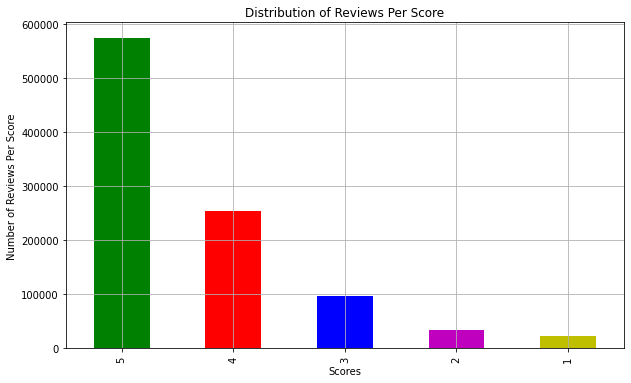

In [8]:
category_dist = reviews_data['Score'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'm', 'y']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

- <p style="font-size:15px">Filtering only positive and negative reviews i.e., not taking into consideration those reviews with Score=3.</p>

In [9]:
reviews_data = reviews_data.loc[reviews_data['Score'] != 3]

reviews_data.shape

(886425, 6)

In [10]:
#give reviews with Score > 3 a positive rating and reviews with a score < 3 a negative rating
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

actualScore = reviews_data['Score']
pos_neg = actualScore.map(partition)
reviews_data['Score'] = pos_neg

reviews_data.head()

,ProductId,Score,Text,UserId,Summary,Time
0,B000F83SZQ,Positive,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,Positive,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,Positive,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,Positive,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


In [11]:
reviews_data = reviews_data.head(50000) #considering only 50k rows

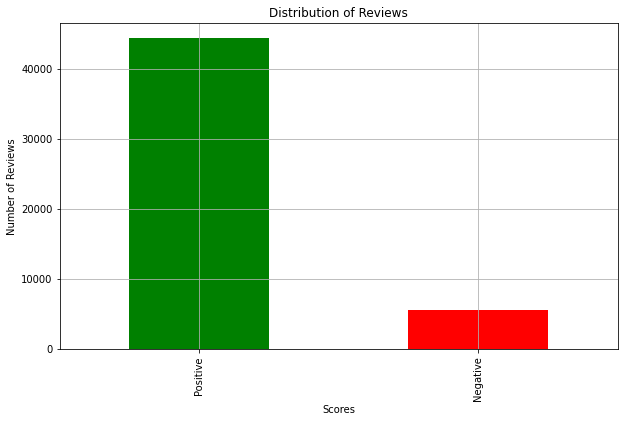

In [12]:
category_dist = reviews_data['Score'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()

In [13]:
reviews_data[reviews_data['UserId']=='A3SPTOKDG7WBLN']

,ProductId,Score,Text,UserId,Summary,Time
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200
56510,B004TPN464,Positive,The fact that these stories have not been upda...,A3SPTOKDG7WBLN,Love Penny Nichols,1366329600
56521,B004TPN7OI,Positive,Very sad that there were not more Penny Nichol...,A3SPTOKDG7WBLN,Penny Nichols rocks!,1366329600


In [14]:
#sorting data according to ProductId in ascending order
reviews_data = reviews_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [15]:
#deduplication of entries
reviews_data = reviews_data.drop_duplicates(subset={"ProductId","UserId","Time","Text"}, keep='first', inplace=False)
reviews_data.shape

(50000, 6)

<font color=DodgerBlue><h3>Data Preprocessing</h3></font>

In [17]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [18]:
for index, row in reviews_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', reviews_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

reviews_data.head()

THERE IS NO TEXT DESCRIPTION FOR ID : 32652


,ProductId,Score,Text,UserId,Summary,Time
0,B000F83SZQ,Positive,enjoy vintage books movies enjoyed reading boo...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,Positive,book reissue old one author born 1910 era say ...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,Positive,fairly interesting read old style terminology ...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,Positive,never read amy brewster mysteries one really h...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,Positive,like period pieces clothing lingo enjoy myster...,A3SPTOKDG7WBLN,Period Mystery,1395187200


In [19]:
#checking null values
reviews_data.isna().sum()

ProductId    0
Score        0
Text         1
UserId       0
Summary      0
Time         0
dtype: int64

In [20]:
#removing null values(row)
reviews_data.dropna(axis=0, inplace=True)
reviews_data.isna().sum()

ProductId    0
Score        0
Text         0
UserId       0
Summary      0
Time         0
dtype: int64

In [21]:
reviews_data.shape

(49999, 6)

In [22]:
reviews_data.tail()

,ProductId,Score,Text,UserId,Summary,Time
58089,B004U362DC,Positive,holy cow g r e book told well first page freak...,AQUK5N7UTVB4P,"WHATS GOING ON TODAY, SO REAL!",1381795200
58090,B004U362DC,Negative,dont understand glowing reviews see lot melodr...,A388UWSU8IPAWP,nah,1367539200
58091,B004U362DC,Positive,book kept interest beginning end well written ...,AWCK8U7SZG25L,Very Good Book,1392940800
58079,B004U362DC,Positive,nailed joseph flynn gripping tale takes place ...,A25OUHLNKLMDD9,Gripping Mystery,1347840000
58123,B004U362DC,Positive,flynn nailed one elements one wants genre stor...,A2OU6CFXCGROP7,Excellent,1380240000


In [23]:
reviews_data['Score'].value_counts()

Positive    44381
Negative     5618
Name: Score, dtype: int64

- <p style="font-size:15px">It has been observed that our target class has an imbalance. So, we’ll try to upsample the data so that the minority class matches with the majority class.</p>


- <p style="font-size:15px">Imbalanced Data refers to those types of datasets where the target class has an uneven distribution of observations, i.e., one class label has a very high number of observations and the other has a very low number of observations.</p>

In [24]:
#ref: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from sklearn.utils import resample

#create two different dataframe of majority and minority class 

cls_majority = reviews_data[(reviews_data['Score']=='Positive')] 
cls_minority = reviews_data[(reviews_data['Score']=='Negative')] 

# upsample minority class
cls_minority_upsampled = resample(cls_minority, 
                                 replace=True,    #sample with replacement
                                 n_samples= 44381, #to match majority class
                                 random_state=42)  #reproducible results
# Combine majority class with upsampled minority class
upsampled_data = pd.concat([cls_minority_upsampled, cls_majority])

In [25]:
upsampled_data.head()

,ProductId,Score,Text,UserId,Summary,Time
8745,B002Y26QWS,Negative,started great promise found died soon found pr...,A1ZTIIU0V1KTFC,Had potential...,1325635200
55393,B004TBDB48,Negative,enjoy brett battles books like carlos feel lik...,AMZWHFSIZCI2W,Rip Off - sort of...,1307836800
53762,B004SBMK5U,Negative,kind book endless writing ofdiana charles wedd...,A29QBZJ00B5N2I,Kate's Wedding,1403222400
53357,B004S7F2VS,Negative,book makes sense understand jokes ones underst...,A2E9FE9O7CVB7G,Nonsense,1381104000
37946,B004G5Z48S,Negative,bought mercy included excerpt book excerpt sou...,A3N9N0P5B3BK7B,Short Story/Novella,1293840000


In [26]:
upsampled_data.shape

(88762, 6)

In [27]:
upsampled_data['Score'].value_counts()

Negative    44381
Positive    44381
Name: Score, dtype: int64

<h3><font color=DodgerBlue>Train Test Split</font></h3>

In [28]:
from sklearn.model_selection import train_test_split
X = upsampled_data['Text']
Y = upsampled_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [29]:
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])
print("NUMBER OF DATA POINTS IN TEST DATA :", X_test.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 56807
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 14202
NUMBER OF DATA POINTS IN TEST DATA : 17753


<h3><font color=DodgerBlue>TF-IDF</font></h3>

In [30]:
#perform_tfidf_vectorization_of_text_data
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(X_train.values)

train_text = text_vec.transform(X_train.values)
test_text = text_vec.transform(X_test.values)
cv_text = text_vec.transform(X_cv.values)

print("Shape of Matrix - TFIDF")
print(train_text.shape)
print(test_text.shape)
print(cv_text.shape)

Shape of Matrix - TFIDF
(56807, 5000)
(17753, 5000)
(14202, 5000)


<h3><font color=DodgerBlue>Confusion / Precision / Recall Matrix</font></h3>

In [31]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [0,1]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(8,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

<h3><font color=orange>Logistic Regression Model</font></h3>

For Values of Alpha = 1e-05 The Log Loss is: 0.1874222604802398
For Values of Alpha = 0.0001 The Log Loss is: 0.23962316798779013
For Values of Alpha = 0.001 The Log Loss is: 0.3064638288925259
For Values of Alpha = 0.01 The Log Loss is: 0.3468511401064266
For Values of Alpha = 0.1 The Log Loss is: 0.3557359787915067
For Values of Alpha = 1 The Log Loss is: 0.35500719101668593


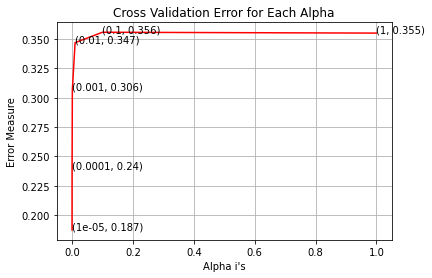

For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.15253560593949955
For Values of Best Alpha = 1e-05 The Test Log Loss is: 0.18438127714047778
For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.1874222604802398


In [32]:
#train a logistic regression + calibration model using text features which are tfidf encoded
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text, y_train)
    
    predict_y = sig_clf.predict_proba(cv_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c='r')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text, y_train)

predict_y = lr_sig_clf.predict_proba(train_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(test_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Test Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text)
print('For Values of Best Alpha =', alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [33]:
lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
lr_test_accuracy = (lr_sig_clf.score(test_text, y_test)*100)
lr_cv_accuracy = (lr_sig_clf.score(cv_text, y_cv)*100)

print("Logistic Regression Train Accuracy -",lr_train_accuracy)
print("Logistic Regression Test Accuracy -",lr_test_accuracy)
print("Logistic Regression CV Accuracy -",lr_cv_accuracy)

Logistic Regression Train Accuracy - 94.57109159082508
Logistic Regression Test Accuracy - 93.38703317749113
Logistic Regression CV Accuracy - 93.0150683002394


---------------------------------------- Confusion Matrix ----------------------------------------


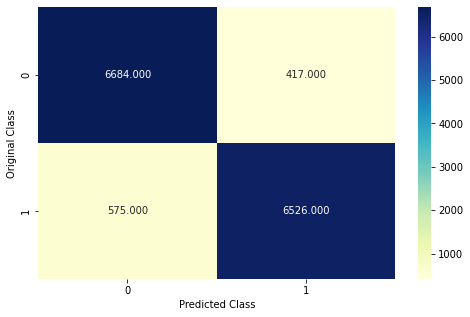

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


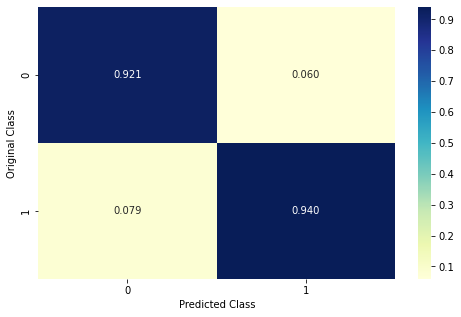

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


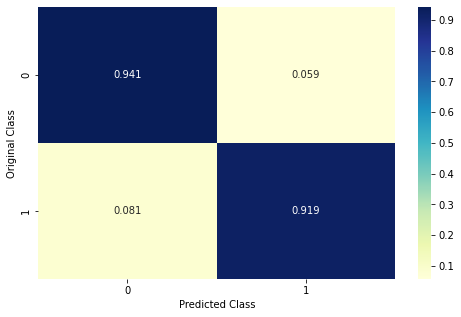

In [34]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text.toarray()))

**<font color=blue>Predict - Test Data</font>**

In [35]:
test_pred = lr_sig_clf.predict(test_text)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    Negative       0.93      0.94      0.93      8877
    Positive       0.94      0.93      0.93      8876

    accuracy                           0.93     17753
   macro avg       0.93      0.93      0.93     17753
weighted avg       0.93      0.93      0.93     17753



In [38]:
test_pred_list = test_pred.tolist()
test_pred_list[:5]

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

In [39]:
final_test_df = pd.DataFrame({'Text':X_test, 'Review':test_pred_list})

In [40]:
final_test_df.head(10)

,Text,Review
25678,cattitude full sass quirkiness cute original s...,Positive
42425,lot good ideas book seem bit stretch,Positive
14576,short still give savannah stuart katie reus ma...,Positive
24463,contents four explicit sex scenes several scen...,Positive
18447,rod hannah rock star every way top world anoth...,Positive
20891,new ground covered unless count fact domestic ...,Negative
29998,enjoy would recommend preteens teens unless cr...,Negative
17788,basic storyline good writing style stilted phr...,Negative
17268,seemed bad term paper lots reference books als...,Negative
57186,written parley p pratt soooooo got read story ...,Positive


In [41]:
final_test_df.values[5]

array(['new ground covered unless count fact domestic violence victim rich black kept waiting something happen still waiting conflicts book laughable dani taylor seem communicate get beyond pasts intruder breaks dani apartment reggie finds scene ridiculous dani concern exposing reggie affect parents oh let forget last little gina thing please book stretched far long real insights anyone behavior oh explanations implausible could made 12 yr old sorry book boring ',
       'Negative'], dtype=object)